<a href="https://colab.research.google.com/github/yqwang01/COMPSCI526Project4-CovidEffects/blob/main/cluster2time.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

# 1. 加载数据
data = pd.read_excel('/content/drive/MyDrive/COMPSCI526/COVID-19-Constructed-Dataset-(PANEL).xlsx')

# 数据预处理：处理空值
data = data.dropna()

# 创建 'learning_mode' 列并数值化 (0 = in-person, 1 = online)
data['learning_mode'] = data['timeperiod'].apply(lambda x: 0 if x in [0, 1, 2] else 1)
median_income = data['householdincome'].median()
data['income'] = (data['householdincome'] <= median_income).astype(int)
#median_income
data

,studentID,school,gradelevel,gender,covidpos,householdincome,freelunch,numcomputers,familysize,fathereduc,mothereduc,readingscore,writingscore,mathscore,readingscoreSL,writingscoreSL,mathscoreSL,timeperiod,learning_mode,income
0,1,0,6,1,1,59065.136719,0,5,3,1,0,73.393600,68.847290,86.905823,84.650970,83.348419,71.108353,2,0,1
1,1,0,6,1,1,59065.136719,0,5,3,1,0,62.566071,73.258034,56.995117,77.571396,74.594040,57.717148,4,1,1
2,1,0,6,1,1,59065.136719,0,5,3,1,0,79.965630,67.070084,56.612415,87.659691,80.292519,85.021355,1,0,1
3,1,0,6,1,1,59065.136719,0,5,3,1,0,68.552406,55.633102,73.727753,69.650352,48.293591,86.596375,3,1,1
4,1,0,6,1,1,59065.136719,0,5,3,1,0,82.541451,87.166336,65.315819,68.989784,85.802025,65.637871,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8395,1400,1,12,1,1,65783.632812,1,2,3,3,0,73.328003,67.402504,87.349442,70.828003,64.902504,84.849442,0,0,1
8396,1400,1,12,1,1,65783.632812,1,2,3,3,3,58.969883,84.165405,64.040802,56.469883,81.665405,61.540802,2,0,1
8397,1400,1,12,1,1,65783.632812,1,2,3,3,3,51.975296,82.905457,77.368134,49.475296,80.405457,74.868134,3,1,1
8398,1400,1,12,1,1,65783.632812,1,2,3,3,3,64.103790,47.846565,81.086067,61.603794,45.346565,78.586067,1,0,1


In [ ]:
# 2. 选择用于聚类的特征
features = ['readingscore' ,	'writingscore' ,	'mathscore','readingscoreSL' ,	'writingscoreSL' ,	'mathscoreSL']
X = data[features]

# 3. 数据标准化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

from sklearn.decomposition import PCA
import seaborn as sns

# 2. 应用 PCA
pca = PCA()
pca.fit(X_scaled)

# 3. 获取解释方差比
explained_variance_ratio = pca.explained_variance_ratio_

# 4. 获取主成分贡献矩阵（即每个主成分的特征系数）
components = pca.components_

# 5. 显示每个主成分的解释方差比和对应的特征
for i, (var_ratio, component) in enumerate(zip(explained_variance_ratio, components)):
    print(f"\n主成分 {i + 1}: 解释方差比 = {var_ratio:.4f}")
    print("特征贡献: ")
    for feature, coef in zip(features, component):
        print(f"  {feature}: {coef:.4f}")


import plotly.express as px

# 1. 使用 PCA 降维到 3D
pca = PCA(n_components=3)
X_pca_3d = pca.fit_transform(X_scaled)

# 2. 将降维后的结果和聚类结果组合成一个 DataFrame，便于 Plotly 使用
df_pca = pd.DataFrame(X_pca_3d, columns=['PCA1', 'PCA2', 'PCA3'])
#df_pca['cluster'] = clusters

# 3. 使用 Plotly 进行 3D 可视化
fig = px.scatter_3d(df_pca, x='PCA1', y='PCA2', z='PCA3', #color='cluster',
                    title='PCA - 3D Clustering Visualization',
                    labels={'PCA1': 'PCA Component 1', 'PCA2': 'PCA Component 2', 'PCA3': 'PCA Component 3'})

# 4. 显示图像
fig.show()



主成分 1: 解释方差比 = 0.4795
特征贡献: 
  readingscore: 0.4253
  writingscore: 0.4213
  mathscore: 0.3970
  readingscoreSL: 0.4161
  writingscoreSL: 0.4131
  mathscoreSL: 0.3744

主成分 2: 解释方差比 = 0.1891
特征贡献: 
  readingscore: -0.1395
  writingscore: -0.4002
  mathscore: 0.5492
  readingscoreSL: -0.1299
  writingscoreSL: -0.3845
  mathscoreSL: 0.5951

主成分 3: 解释方差比 = 0.1731
特征贡献: 
  readingscore: 0.5401
  writingscore: -0.3941
  mathscore: -0.1442
  readingscoreSL: 0.5628
  writingscoreSL: -0.4345
  mathscoreSL: -0.1632

主成分 4: 解释方差比 = 0.0672
特征贡献: 
  readingscore: 0.3081
  writingscore: 0.3195
  mathscore: 0.5435
  readingscoreSL: -0.3497
  writingscoreSL: -0.3467
  mathscoreSL: -0.5149

主成分 5: 解释方差比 = 0.0480
特征贡献: 
  readingscore: 0.5648
  writingscore: 0.1251
  mathscore: -0.4300
  readingscoreSL: -0.5416
  writingscoreSL: -0.1256
  mathscoreSL: 0.4140

主成分 6: 解释方差比 = 0.0430
特征贡献: 
  readingscore: -0.3065
  writingscore: 0.6239
  mathscore: -0.1991
  readingscoreSL: 0.2788
  writingscoreSL: -0.59

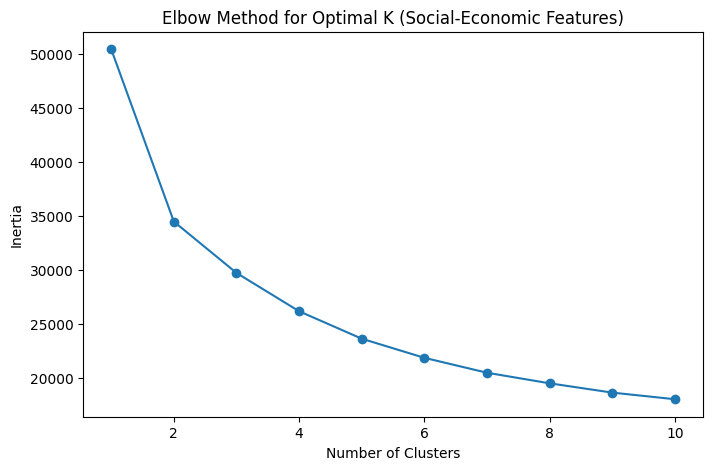

In [ ]:
# 4. 使用肘部法评估最佳聚类数
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# 绘制肘部法图
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method for Optimal K (Social-Economic Features)')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [ ]:
# 5. 应用 K-Means 聚类 (假设肘部法确定 k 为 2)
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# 将聚类结果加入数据框
data['cluster'] = clusters

# 6. 计算轮廓系数
silhouette_avg = silhouette_score(X_scaled, clusters)
print(f'Silhouette Score: {silhouette_avg}')

# 8. 对每个聚类组进行分析
cluster_analysis = data.groupby('cluster')[features].mean()
print("\nCluster Analysis (Mean Values per Cluster):")
print(cluster_analysis)

Silhouette Score: 0.278548409308054

Cluster Analysis (Mean Values per Cluster):
         readingscore  writingscore  mathscore  readingscoreSL  \
cluster                                                          
0           80.415538     83.443318  80.904229       77.386353   
1           64.759513     66.740885  66.071565       61.741783   

         writingscoreSL  mathscoreSL  
cluster                               
0             79.261772    77.345950  
1             63.897794    63.267931  


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.manifold import TSNE

# 1. 使用 PCA 降维到 3D
pca = PCA(n_components=3)
X_pca_3d = pca.fit_transform(X_scaled)

# 2. 将降维后的结果和聚类结果组合成一个 DataFrame，便于 Plotly 使用
df_pca = pd.DataFrame(X_pca_3d, columns=['PCA1', 'PCA2', 'PCA3'])
df_pca['cluster'] = clusters
df_pca['school'] = data['school']
df_pca['learning_mode'] = data['learning_mode']

# 3. 使用 Plotly 进行 3D 可视化
fig = px.scatter_3d(df_pca, x='PCA1', y='PCA2', z='PCA3', color='learning_mode',
                    title='PCA - 3D Clustering Visualization',
                    labels={'PCA1': 'PCA Component 1', 'PCA2': 'PCA Component 2', 'PCA3': 'PCA Component 3'})

# 4. 显示图像
fig.show()

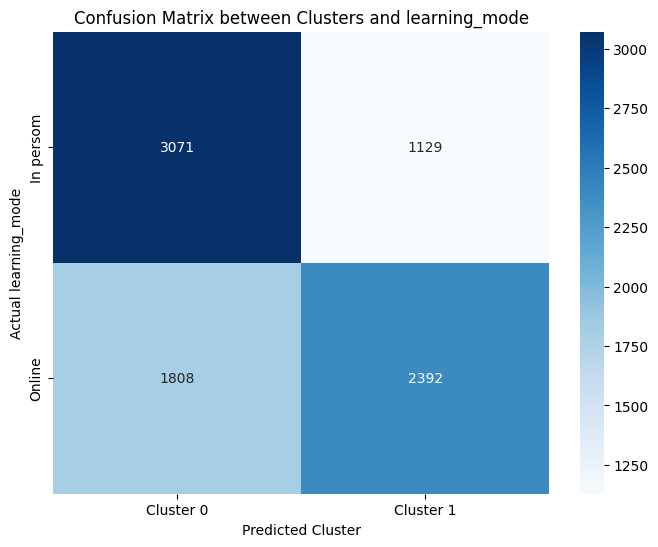

In [ ]:
from sklearn.metrics import confusion_matrix


# 1. 生成混淆矩阵
cm0 = confusion_matrix(data['learning_mode'], data['cluster'])

# 2. 可视化混淆矩阵
plt.figure(figsize=(8, 6))
sns.heatmap(cm0, annot=True, fmt='d', cmap='Blues', xticklabels=['Cluster 0', 'Cluster 1'],
            yticklabels=['In persom', 'Online'])
plt.xlabel('Predicted Cluster')
plt.ylabel('Actual learning_mode')
plt.title('Confusion Matrix between Clusters and learning_mode')
plt.show()


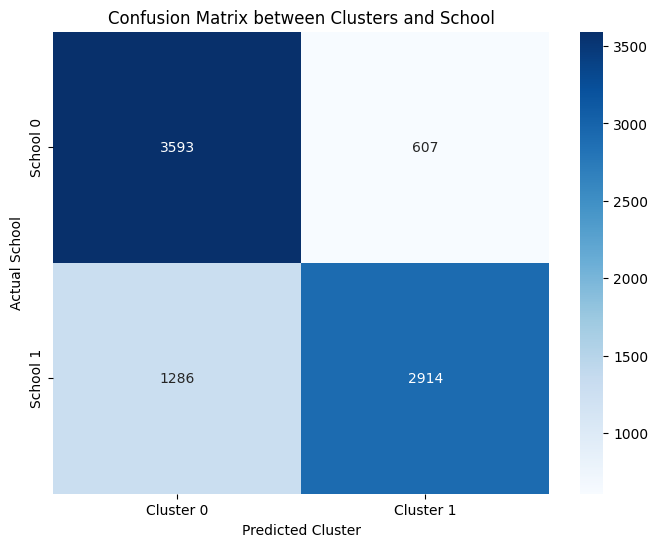

In [ ]:
# 1. 生成混淆矩阵
cm1 = confusion_matrix(data['school'], data['cluster'])

# 2. 可视化混淆矩阵
plt.figure(figsize=(8, 6))
sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues', xticklabels=['Cluster 0', 'Cluster 1'],
            yticklabels=['School 0', 'School 1'])
plt.xlabel('Predicted Cluster')
plt.ylabel('Actual School')
plt.title('Confusion Matrix between Clusters and School')
plt.show()

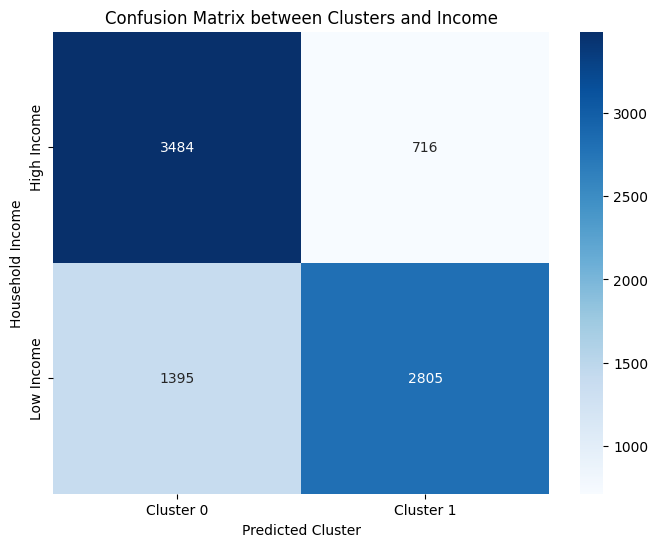

In [ ]:
# 1. 生成混淆矩阵
cm2 = confusion_matrix(data['income'], data['cluster'])

# 2. 可视化混淆矩阵
plt.figure(figsize=(8, 6))
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues', xticklabels=['Cluster 0', 'Cluster 1'],
            yticklabels=['High Income', 'Low Income'])
plt.xlabel('Predicted Cluster')
plt.ylabel('Household Income')
plt.title('Confusion Matrix between Clusters and Income')
plt.show()